In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
from Bio import SeqIO
import re
import coralme
plt.rcParams['svg.fonttype'] = 'none'
pandas.set_option('display.max_colwidth', None)
%load_ext autoreload
%autoreload 2


In [2]:
from coralme.builder.main import MEBuilder
from coralme.util.flux_analysis import flux_based_reactions
import coralme
import pandas
import tqdm

## Naive model

In [3]:
# model = coralme.io.pickle.load_pickle_me_model("./me_model_files/KT2440-DLKcat.pkl")
model = coralme.io.pickle.load_pickle_me_model("./me_model_files/MEModel-step3-pputida-TS-UPF36.pkl")

Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-03
Read LP format model from file /tmp/tmp0o0iampr.lp
Reading time = 0.00 seconds
: 0 rows, 0 columns, 0 nonzeros
Read LP format model from file /tmp/tmpyoujmisf.lp
Reading time = 0.01 seconds
: 2162 rows, 5896 columns, 23426 nonzeros
Read LP format model from file /tmp/tmpe75y1ke5.lp
Reading time = 0.01 seconds
: 2166 rows, 5894 columns, 23388 nonzeros


### M9

In [4]:
for r in model.reactions.query("^EX_"):
    r.lower_bound = 0

In [5]:
medium = pandas.read_csv("./media/M9.txt",index_col=0,header=None,comment="#")[1]
for r,b in medium.items():
    model.reactions.get_by_id(r).lower_bound = -b

In [6]:
model.optimize(max_mu=1.0)

Iteration	 Solution to check	Solver Status
---------	------------------	-------------
        1	0.5000000000000000	Optimal
        2	0.7500000000000000	Not feasible
        3	0.6250000000000000	Optimal
        4	0.6875000000000000	Not feasible
        5	0.6562500000000000	Not feasible
        6	0.6406250000000000	Not feasible
        7	0.6328125000000000	Optimal
        8	0.6367187500000000	Not feasible
        9	0.6347656250000000	Not feasible
       10	0.6337890625000000	Optimal
       11	0.6342773437500000	Optimal
       12	0.6345214843750000	Optimal
       13	0.6346435546875000	Not feasible
       14	0.6345825195312500	Optimal
       15	0.6346130371093750	Optimal
       16	0.6346282958984375	Optimal
       17	0.6346359252929688	Not feasible
       18	0.6346321105957031	Not feasible
       19	0.6346302032470703	Optimal
       20	0.6346311569213867	Optimal


True

In [7]:
from coralme.util.flux_analysis import exchange_single_model,flux_based_reactions
exchange_single_model(model).sort_values("flux",ascending=False).head(20)

,name,reaction,lower_bound,upper_bound,flux
id,,,,,
EX_h2o_e,,1.0 h2o_e <=>,-100,999999.0,4.195663e+01
EX_co2_e,,1.0 co2_e -->,0,999999.0,2.472880e+01
EX_h_e,,1.0 h_e <=>,-100,999999.0,6.539237e+00
biomass_dilution,,1.0 biomass -->,mu,mu,6.346312e-01
EX_ac_e,,1.0 ac_e -->,0,999999.0,3.902820e-01
DM_5drib_c,,1.0 5drib_c -->,0.0,999999.0,4.307514e-04
DM_tripeptide_c,,1.0 tripeptide_c -->,0.0,999999.0,1.858187e-04
DM_amob_c,,1.0 amob_c -->,0.0,999999.0,1.477059e-04
DM_doxopa_c,,1.0 doxopa_c -->,0.0,999999.0,1.415227e-04


## Proteome allocation

We here use some of the functions provided in coralME to calculate proteome allocation. This part of the analysis can take several minutes to run. The algorithm needs to traverse the ME-network finding where all proteins go (accounting for final destinations only) and calculate the partitioning from the fluxes.

### Calculate protein to complex partitioning

Here we calculate the final complexes to which 1 unit of every protein goes

In [8]:
me = model

In [9]:
from coralme.util.flux_analysis import get_partitioning,get_immediate_partitioning

In [10]:
ComplexPartitioning = {}
for protein in tqdm.tqdm(me.metabolites.query("^protein_")):
    if not isinstance(protein,coralme.core.component.TranslatedGene):
        continue
    partitioning = get_partitioning(protein,seen = set(),final_fraction=1.0)
    if not partitioning:
        continue
    ComplexPartitioning[protein.id] = {k.id:v for k,v in partitioning}

100%|██████████| 2156/2156 [47:21<00:00,  1.32s/it]  


In [11]:
pandas.DataFrame.from_dict(ComplexPartitioning).fillna(0.).head()

,protein_PP_0003,protein_PP_0008,protein_PP_0026,protein_PP_0037,protein_PP_0059,protein_PP_0060,protein_PP_0061,protein_PP_0063,protein_PP_0066,protein_PP_0067,...,protein_PP_5412,protein_PP_5413,protein_PP_5414,protein_PP_5415,protein_PP_5416,protein_PP_5417,protein_PP_5418,protein_PP_5419,protein_PP_5420,protein_dummy
ribosome,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
polycistronic_wout_rRNA_excision_machinery,0.0,0.378820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
monocistronic_excision_machinery,0.0,0.217005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rRNA_containing_excision_machinery,0.0,0.404175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G1G01-27-MONOMER,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Calculate protein to function partitioning

Here we calculate the final reactions to which 1 unit of every protein goes

In [12]:
ReactionPartitioning = {}
for protein,partitioning in tqdm.tqdm(ComplexPartitioning.items()):
    ReactionPartitioning[protein] = {}
    tmp = pandas.Series()
    for k,fraction in partitioning.items():
        ip = {k.id:v for k,v in get_immediate_partitioning(me.get(k)).items()}
        tmp = tmp.append(pandas.Series(ip) * fraction)
        if tmp.duplicated().any():
            tmp = tmp.to_frame().reset_index().groupby("index").sum()[0]
    ReactionPartitioning[protein] = tmp.to_dict()

  0%|          | 0/608 [00:00<?, ?it/s]/tmp/ipykernel_324721/1243837850.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  tmp = pandas.Series()
/tmp/ipykernel_324721/1243837850.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pandas.Series(ip) * fraction)
  0%|          | 1/608 [00:33<5:37:11, 33.33s/it]/tmp/ipykernel_324721/1243837850.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  tmp = pandas.Series()
/tmp/ipykernel_324721/1243837850.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pandas.Series(ip) * fraction)
/tmp/ipykernel_32472

In [13]:
ReactionPartitioning = pandas.DataFrame.from_dict(ReactionPartitioning).fillna(0.)
ReactionPartitioning.head()

,protein_PP_0003,protein_PP_0008,protein_PP_0026,protein_PP_0037,protein_PP_0059,protein_PP_0060,protein_PP_0061,protein_PP_0063,protein_PP_0066,protein_PP_0067,...,protein_PP_5412,protein_PP_5413,protein_PP_5414,protein_PP_5415,protein_PP_5416,protein_PP_5417,protein_PP_5418,protein_PP_5419,protein_PP_5420,protein_dummy
translation_PP_0003,8.618049e-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.618049e-09,1.170969e-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
translation_PP_0008,1.280470e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.280470e-07,2.804495e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
translation_PP_0026,1.292406e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.292406e-08,1.260151e-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
translation_PP_0037,2.938496e-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.938496e-04,2.010286e-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
translation_PP_0059,2.244803e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.244803e-05,3.764698e-05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Get protein translation fluxes

In [14]:
dct = {}
for r in me.query("translation_"):
    p = "protein_" + r.id.split("translation_")[1]
    dct[p] = r.flux * me.get(p).formula_weight/1000
TranslationFluxes = pandas.Series(dct)
TranslationFluxes.head()

protein_PP_0003    3.703516e-09
protein_PP_0008    5.542457e-08
protein_PP_0026    5.363815e-09
protein_PP_0037    1.248466e-04
protein_PP_0041    0.000000e+00
dtype: float64

### Combine results into one dataframe

Now we calculate the contributions of all proteins to every reaction flux

In [15]:
FluxPartitioning = (ReactionPartitioning*TranslationFluxes).dropna(axis=1)
FluxPartitioning.head()

,protein_PP_0003,protein_PP_0008,protein_PP_0026,protein_PP_0037,protein_PP_0059,protein_PP_0060,protein_PP_0061,protein_PP_0063,protein_PP_0066,protein_PP_0067,...,protein_PP_5413,protein_PP_5414,protein_PP_5415,protein_PP_5416,protein_PP_5417,protein_PP_5418,protein_PP_5419,protein_PP_5420,protein_PP_5706,protein_dummy
translation_PP_0003,3.191709e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.293797e-17,1.364328e-14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
translation_PP_0008,4.742241e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.351324e-16,3.267594e-13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
translation_PP_0026,4.786448e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.438496e-17,1.468237e-14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
translation_PP_0037,1.088277e-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.145996e-12,2.342240e-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
translation_PP_0059,8.313663e-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.639389e-13,4.386354e-11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The sum of all fluxes should add up to the protein biomass

In [16]:
FluxPartitioning.sum().sum()

0.2665801598975291

In [17]:
me.solution.fluxes["protein_biomass_to_biomass"]

0.2697202294818797

### Get reaction to class dictionary

Here we classify all reactions into categories to simplify the analysis

In [18]:
def get_function(r,metabolics=False):
    if isinstance(r,coralme.core.reaction.MetabolicReaction) and hasattr(r,'subsystem'):
        if r.subsystem and metabolics:
            return 'Metabolic:' + r.subsystem
        return 'Metabolic'
    if isinstance(r,coralme.core.reaction.TranslationReaction):
        return 'Translation'
    elif isinstance(r,coralme.core.reaction.TranscriptionReaction):
        return 'Transcription'
    elif isinstance(r,coralme.core.reaction.tRNAChargingReaction):
        return 'tRNA-Charging'
    elif isinstance(r,coralme.core.reaction.PostTranslationReaction):
        return 'Post-translation'
    elif isinstance(r,coralme.core.reaction.SummaryVariable):
        return 'Biomass'
    return "No_function"

In [36]:
def simplify(s):
    s = s.split("__")[-1]
    s = s.replace("S_","")
    s = s.replace("_"," ")
    s = s.replace("Metabolic:","")
    
    if "Cofactor" in s:
        return "Cofactor metabolism"
    if "No subsystem" in s:
        return "Other"
    return s

In [38]:
ReactionToClass = pandas.DataFrame(index=[r.id for r in me.reactions]).reset_index()
ReactionToClass["Function1"] = ReactionToClass["index"].apply(lambda x:get_function(me.get(x)))
ReactionToClass["Function2"] = ReactionToClass["index"].apply(lambda x:get_function(me.get(x),metabolics=True))
ReactionToClass["Function3"] = ReactionToClass["Function2"].apply(lambda x:simplify(x))
ReactionToClass = ReactionToClass.set_index("index").sort_index()
ReactionToClass.head()

,Function1,Function2,Function3
index,,,
13DAMPPabcpp_FWD_CPLX_dummy,Metabolic,Metabolic:S_Transport__ABC_system,ABC system
13DAMPPabcpp_REV_CPLX_dummy,Metabolic,Metabolic:S_Transport__ABC_system,ABC system
13DAMPPtex_FWD_CPLX_dummy,Metabolic,Metabolic:S_Transport__Outer_Membrane,Outer Membrane
13DAMPPtex_REV_CPLX_dummy,Metabolic,Metabolic:S_Transport__Outer_Membrane,Outer Membrane
13PPDH2_1_FWD_G1G01-2668-MONOMER,Metabolic,Metabolic:S_Alternate_Carbon,Alternate Carbon


### Visualize proteome allocation

Now we annotate it for further analysis

In [39]:
AnnotatedFluxPartitioning = pandas.concat([FluxPartitioning,ReactionToClass],axis=1).dropna(axis=0)
AnnotatedFluxPartitioning.head()

,protein_PP_0003,protein_PP_0008,protein_PP_0026,protein_PP_0037,protein_PP_0059,protein_PP_0060,protein_PP_0061,protein_PP_0063,protein_PP_0066,protein_PP_0067,...,protein_PP_5416,protein_PP_5417,protein_PP_5418,protein_PP_5419,protein_PP_5420,protein_PP_5706,protein_dummy,Function1,Function2,Function3
translation_PP_0003,3.191709e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.293797e-17,1.364328e-14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Translation,Translation,Translation
translation_PP_0008,4.742241e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.351324e-16,3.267594e-13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Translation,Translation,Translation
translation_PP_0026,4.786448e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.438496e-17,1.468237e-14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Translation,Translation,Translation
translation_PP_0037,1.088277e-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.145996e-12,2.342240e-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Translation,Translation,Translation
translation_PP_0059,8.313663e-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.639389e-13,4.386354e-11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Translation,Translation,Translation


/tmp/ipykernel_324721/3474783948.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  AnnotatedFluxPartitioning.groupby("Function1").sum().sum(axis=1).sort_values().plot.pie()


<Axes: >

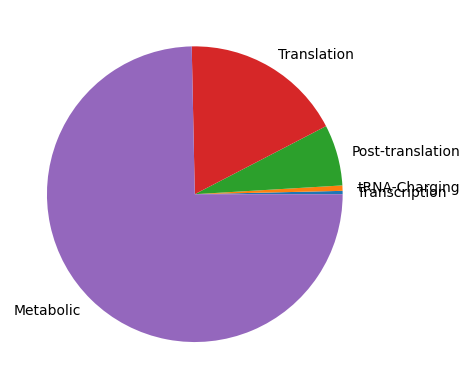

In [40]:
AnnotatedFluxPartitioning.groupby("Function1").sum().sum(axis=1).sort_values().plot.pie()

/tmp/ipykernel_324721/3247755215.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  AnnotatedFluxPartitioning.groupby("Function2").sum().sum(axis=1).sort_values().plot.pie()


<Axes: >

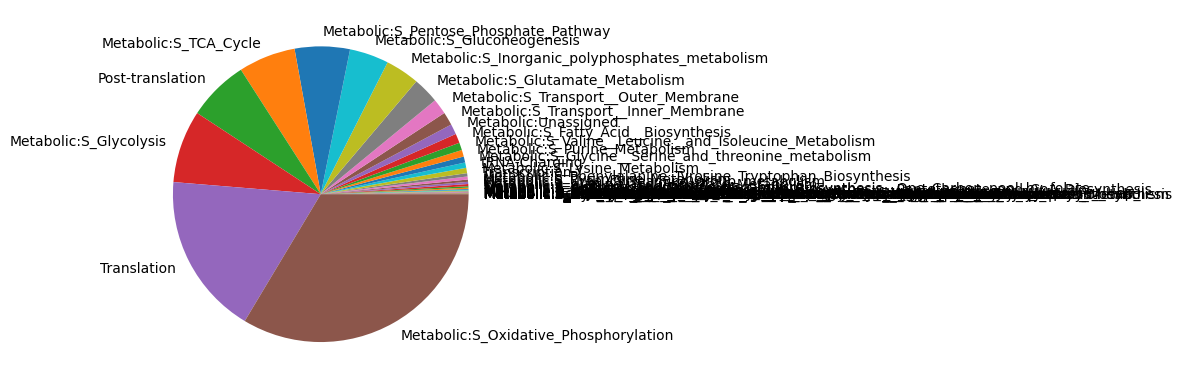

In [43]:
AnnotatedFluxPartitioning.groupby("Function2").sum().sum(axis=1).sort_values().plot.pie()

/tmp/ipykernel_324721/1251236244.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  AnnotatedFluxPartitioning.groupby("Function3").sum().sum(axis=1).sort_values().plot.pie()


<Axes: >

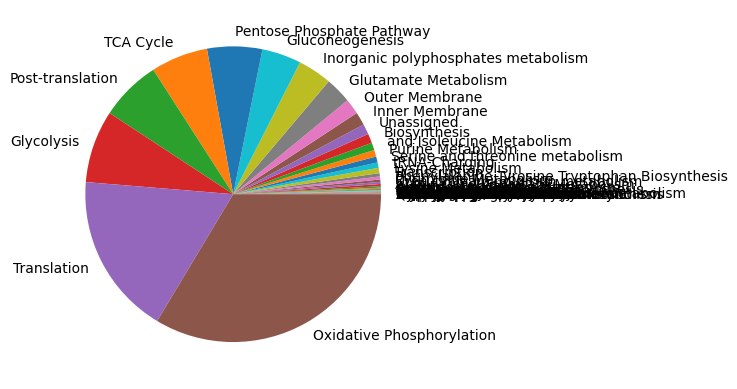

In [44]:
AnnotatedFluxPartitioning.groupby("Function3").sum().sum(axis=1).sort_values().plot.pie()

In [57]:
flux_based_reactions(model,"biomass")

,lb,ub,rxn_flux,met_flux,reaction
biomass_dilution,mu,mu,0.634631,-0.634631,1.0 biomass -->
protein_biomass_to_biomass,0.0,1000.0,0.269720,0.421438,1.0 protein_biomass + 0.5625 unmodeled_protein_biomass --> 1.5625 biomass
rRNA_biomass_to_biomass,0.0,1000.0,0.082081,0.082081,1.0 rRNA_biomass --> 1.0 biomass
lipid_biomass_to_biomass,0.0,1000.0,0.073211,0.073211,1.0 lipid_biomass --> 1.0 biomass
DNA_biomass_to_biomass,0.0,1000.0,0.023203,0.023203,1.0 DNA_biomass --> 1.0 biomass
constituent_biomass_to_biomass,0.0,1000.0,0.020674,0.020674,1.0 constituent_biomass --> 1.0 biomass
tRNA_biomass_to_biomass,0.0,1000.0,0.011426,0.011426,1.0 tRNA_biomass --> 1.0 biomass
mRNA_biomass_to_biomass,0.0,1000.0,0.001906,0.001906,1.0 mRNA_biomass --> 1.0 biomass
prosthetic_group_biomass_to_biomass,0.0,1000.0,0.000692,0.000692,1.0 prosthetic_group_biomass --> 1.0 biomass
tmRNA_biomass_to_biomass,0.0,1000.0,0.000000,0.000000,1.0 tmRNA_biomass --> 1.0 biomass
